<h1 align="center" style="background-color:DodgerBlue;">Desafío - Gráficos y correlación</h1>

>● Para realizar este desafío debes haber estudiado previamente todo el material disponible correspondiente a la unidad.
>
>● Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los requerimientos solicitados y sube el .zip en el LMS.
>
>● Desarrollo desafío: Individual.
>
>● Para la realización del desafío necesitarás apoyarte del archivo Apoyo Desafío -Gráficos y correlación.
### Habilidades a evaluar
>
>● Reconocer las funcionalidades avanzadas de gráficos estáticos mediante seaborn.
>
>● Aprender a realizar gráficos que muestren de forma estratificada el comportamiento de subconjuntos de elementos en la muestra.
>
>● Aplicar funciones a columnas de datos mediante ufuncs, map-reduce-filter.
>
>● Entender e interpretar la correlación a partir de diagramas de dispersión.
### Descripción
>La empresa para la cual trabajas, te ha solicitado continuar el análisis de datos pero, está vez, a partir de gráficos existentes y la correlación que existe entre ellos con la data disponible. Para ello, te entregan un material de apoyo el cual deberá servir como base para desarrollar los siguientes requerimientos.
>
>Requerimientos
>
>A continuación revisaremos los requerimientos y acciones que te han sido solicitados:
>
>1. Importar librerías y .csv. (2 punto) para ello:
>
>● Importe las librerías básicas para el análisis de datos
>
>● Descargue e importe el archivo nations.csv.
>
>Tip: El formato del archivo posee una codificación de tipo 'iso-8859-1'. Investigue cómo se puede solucionar este problema utilizando el argumento encoding de pd.read_csv.
>
>La base de datos contiene información a nivel mundial sobre demografía:
>
>● country: País.
>
>● region: Continente del país.
>
>● gdp: Producto Interno Bruto per cápita, precios 2005.
>
>● school: Promedio años de escolaridad.
>
>● adfert: Fertilidad adolescente (Nacimientos 1:1000 en mujeres entre 15 y 19).
>
>● chldmort: Probabilidad de muerte antes de los 5 años por cada 1000.
>
>● life: Esperanza de vida al nacer.
>
>● pop: Población total.
>
>● urban: Porcentaje de población urbana.
>
>● femlab: Tasa entre hombres y mujeres en el mercado laboral.
>
>● literacy: Tasa de alfabetismo.
>
>● co2: Toneladas de Co2 mitidas per cápita.
>
>● gini: Coeficiente de desigualdad del ingreso.
>
>● Apellidos desde la A hasta la N: Enfocarse en las variables chldmort, adfert y life.
>
>● Apellidos desde la M hasta la Z: Enfocarse en las variables femlab, literacy y school.


In [3]:
#1. Importar librerías y .csv. (2 punto) para ello:
#● Importe las librerías básicas para el análisis de datos

%matplotlib inline
import pandas as pd
import numpy as np
import lec4_graphs as gfx
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.rcParams['figure.figsize'] = (12, 8)

In [4]:
#● Descargue e importe el archivo nations.csv
df = pd.read_csv('datasets/nations.csv', encoding='latin-1')
df.head()

,Unnamed: 0,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
0,1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.0,NaN
1,2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.2,NaN
2,3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.2,NaN
3,4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.2,NaN
4,5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.1,33.299999


0       Africa
1       Africa
2       Africa
3       Africa
4       Africa
5       Africa
6       Africa
7       Africa
8       Africa
9       Africa
10      Africa
11      Africa
12      Africa
13      Africa
14      Africa
15      Africa
16      Africa
17      Africa
18      Africa
19      Africa
20      Africa
21      Africa
22      Africa
23      Africa
24      Africa
25      Africa
26      Africa
27      Africa
28      Africa
29      Africa
30      Africa
31      Africa
32      Africa
33      Africa
34      Africa
35      Africa
36      Africa
37      Africa
38      Africa
39      Africa
40      Africa
41      Africa
42      Africa
43      Africa
44      Africa
45      Africa
46      Africa
47      Africa
48      Africa
49      Africa
50      Africa
51      Africa
52    Americas
53    Americas
54    Americas
Name: region, dtype: object

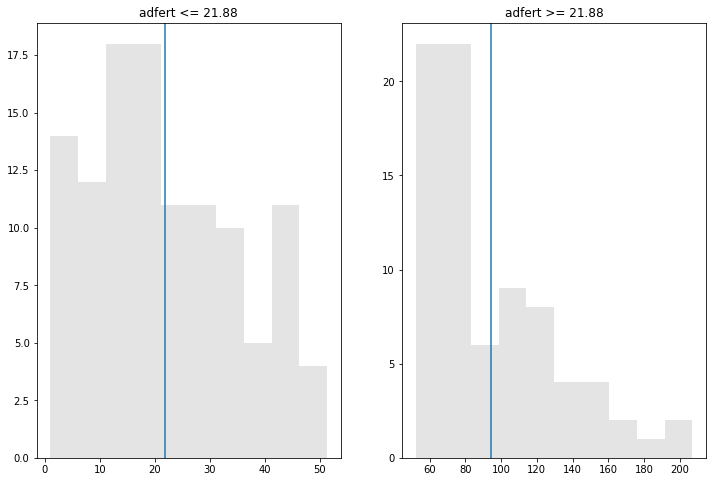

In [6]:
#2. Refactorizar gráficos matplotlib a seaborn (3 puntos). A partir de una serie de gráficos construidos con matplotlib, se solicita refactorizarlos utilizando seaborn.
# Además, se presenta la función que se utilizó para construirlos. Intente llegar al resultado con mayor similitud. Comente los principales resultados de los gráficos.
#● Histogramas
gfx.binarize_histogram(df, 'adfert')

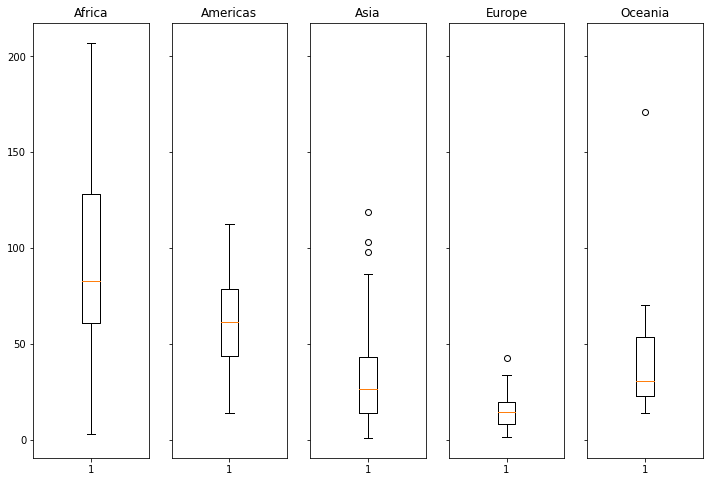

In [7]:
#● Boxplots
gfx.grouped_boxplot(df, 'adfert', 'region')

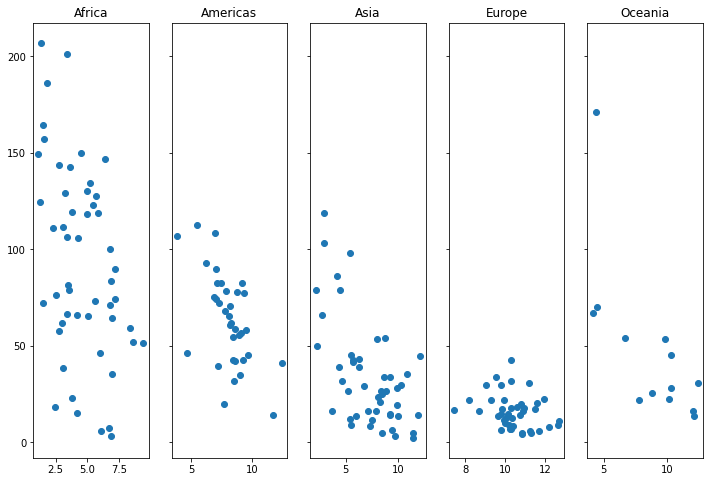

In [8]:
gfx.grouped_scatterplot(df, 'school', 'adfert', 'region')

>3. Generar un heatmap entre todas las variables (2 puntos): Con base en las variables de interés asignadas, comente cuáles son las principales correlaciones existentes, tomando como criterio de corte aquellas superior a .6
>
>4. A partir de las principales correlaciones, separarlas en un nuevo objeto y calcular la matriz de correlaciones para todas las regiones (3 puntos):
>
>● Comente brevemente las principales correlaciones a través de las regiones.
>
>Tip: Genere una nueva tabla segmentando con la siguiente sintaxis: = df.loc[:,['variables', 'a', 'agregar']]. N. No olvide agregar la variable región.
>
>Tip: Genere un loop para recorrer cada región y generar un heatmap.


In [16]:
region = df.loc[:,[ 'school', 'adfert','chldmort','life','literacy','co2','femlab','urban','gdp']]
region

,school,adfert,chldmort,life,literacy,co2,femlab,urban,gdp
0,6.716667,7.300000,34.75,72.316666,72.599998,15.00,0.4522,64.933334,7300.399902
1,3.100000,111.699997,122.75,54.733334,41.700001,1.20,0.8482,41.000000,1338.800049
2,8.600000,52.099998,60.25,52.250000,84.099998,9.20,0.8870,59.250000,12307.400391
3,1.300000,124.800003,170.50,53.783333,23.600000,0.20,0.8584,23.583334,1063.400024
4,2.483333,18.600000,168.50,48.866665,66.599998,0.10,1.0344,10.250000,349.200012
...,...,...,...,...,...,...,...,...,...
189,10.300000,28.299999,26.75,71.533333,98.800003,3.10,0.5010,20.666668,4012.600098
190,4.500000,70.300003,36.00,66.500000,NaN,1.40,0.4858,17.766666,2249.199951
191,10.133333,22.299999,19.25,71.833336,99.000000,4.85,0.7150,23.266666,4072.199951
192,NaN,23.299999,36.50,66.033333,NaN,NaN,NaN,49.233334,NaN


In [17]:
filter = region.filter(items=region).dropna()
filter

,school,adfert,chldmort,life,literacy,co2,femlab,urban,gdp
0,6.716667,7.300000,34.75,72.316666,72.599998,15.00,0.4522,64.933334,7300.399902
1,3.100000,111.699997,122.75,54.733334,41.700001,1.20,0.8482,41.000000,1338.800049
2,8.600000,52.099998,60.25,52.250000,84.099998,9.20,0.8870,59.250000,12307.400391
3,1.300000,124.800003,170.50,53.783333,23.600000,0.20,0.8584,23.583334,1063.400024
4,2.483333,18.600000,168.50,48.866665,66.599998,0.10,1.0344,10.250000,349.200012
...,...,...,...,...,...,...,...,...,...
179,4.400000,171.100006,170.00,49.666668,70.000000,2.25,0.8380,56.250000,4662.000000
188,4.116667,66.900002,69.75,61.483334,60.099998,2.75,0.9656,12.516666,1953.800049
189,10.300000,28.299999,26.75,71.533333,98.800003,3.10,0.5010,20.666668,4012.600098
191,10.133333,22.299999,19.25,71.833336,99.000000,4.85,0.7150,23.266666,4072.199951


<AxesSubplot:>

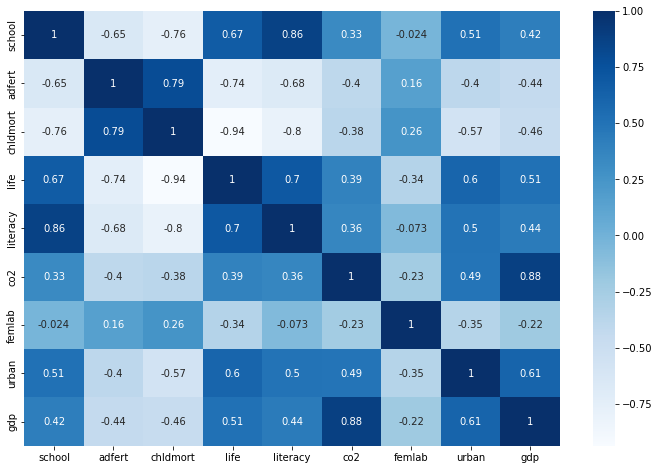

In [18]:
sns.heatmap(filter.corr(), cmap = 'Blues', annot = True)

c:\Users\dmard\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\dmard\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


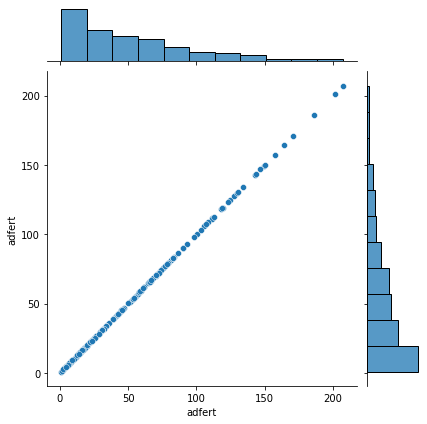

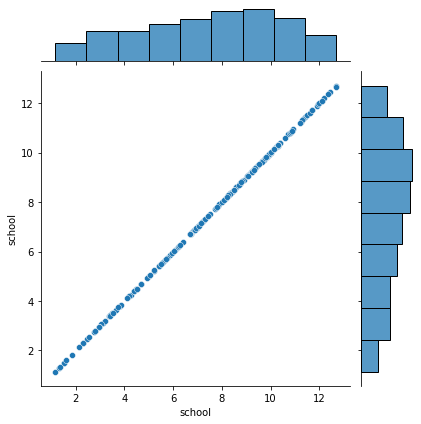

In [12]:
sns.jointplot(region['adfert'],region['adfert'])
sns.jointplot(region['school'],region['school'])